# Regression
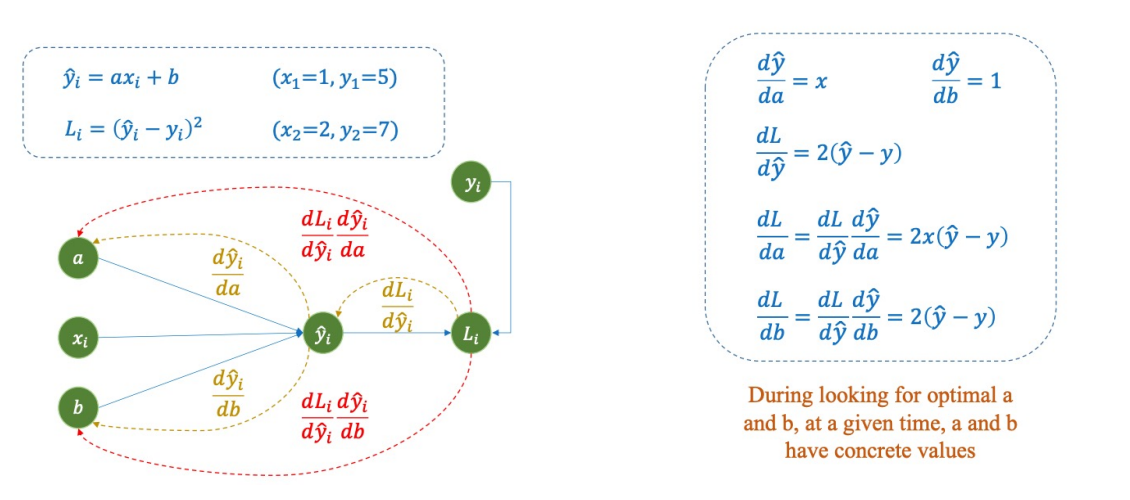
- Stochastic Gradient Descent
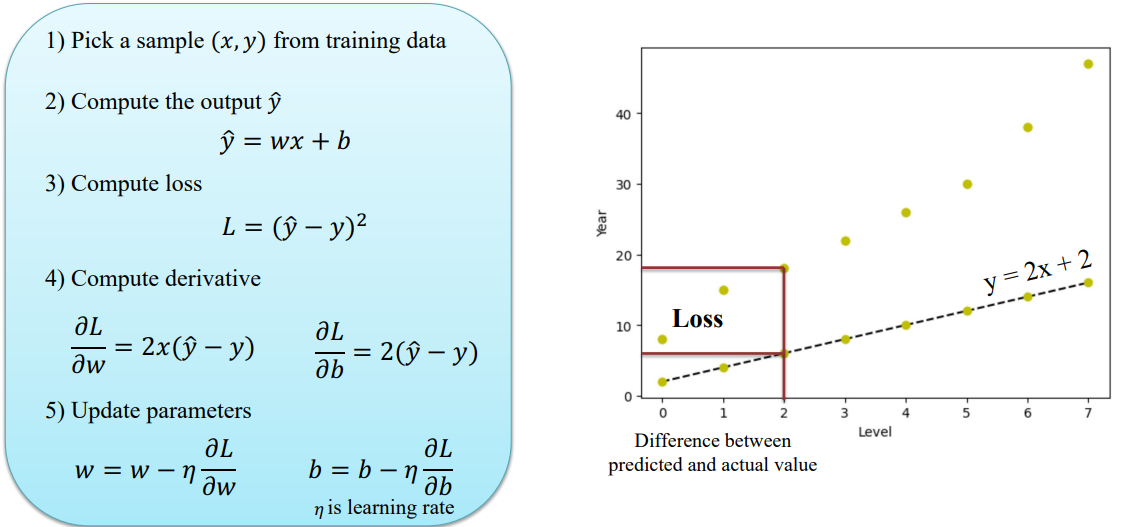
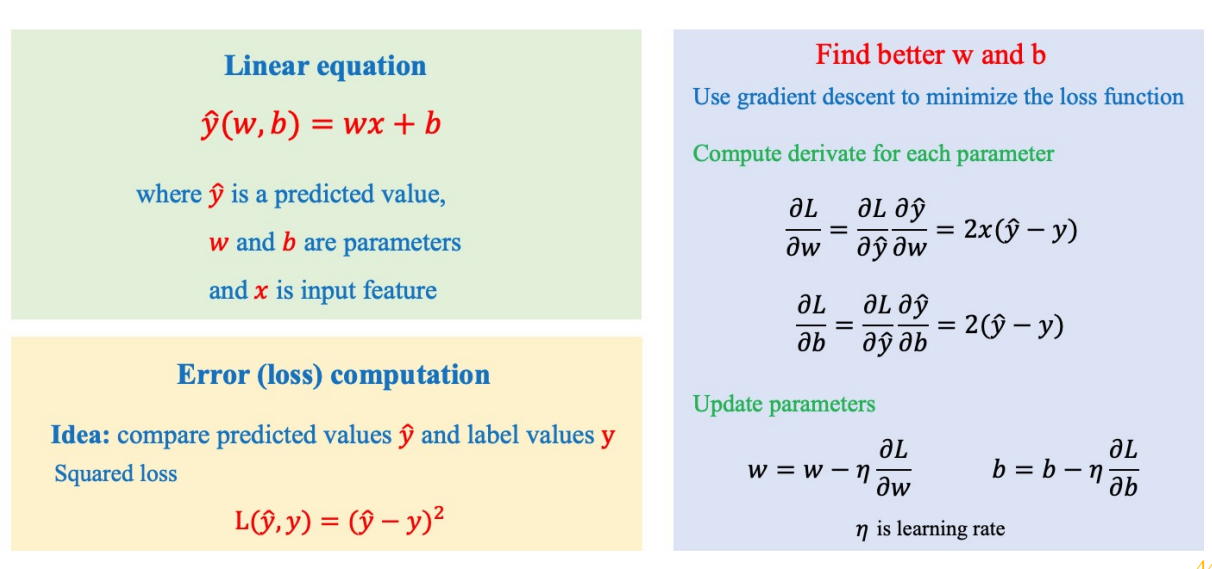

In [2]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [8]:
# load a cvs file
data = pd.read_csv('./data/advertising.csv')
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


29.284473412202484


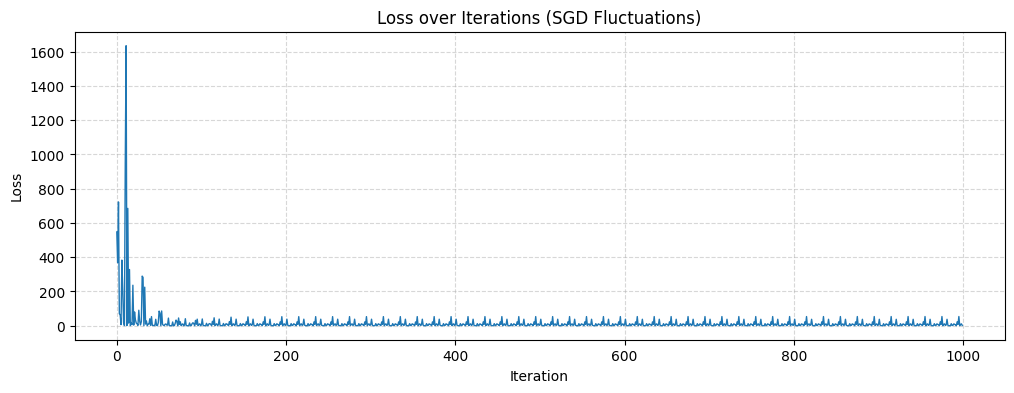

In [16]:
# Load dataset
data = pd.read_csv('./data/advertising.csv')

# Extract features & labels
tv_data = data['TV'].values
radio_data = data['Radio'].values
newspaper_data = data['Newspaper'].values
sales_data = data['Sales'].values

# Initialize weights & bias
w1, w2, w3, b = np.random.randn(), np.random.randn(), np.random.randn(), np.random.randn()

# Define learning rate and iterations
epoch_max = 50
lr = 1e-5
losses = []  # Store losses for plotting

# Stochastic Gradient Descent (SGD)
for epoch in range(epoch_max):
    for i in range(len(data)):  # Iterate through each sample
        # Get a single sample
        x1 = tv_data[i]
        x2 = radio_data[i]
        x3 = newspaper_data[i]
        y = sales_data[i]

        # Compute output (prediction)
        y_hat = w1*x1 + w2*x2 + w3*x3 + b

        # Compute loss
        loss = (y_hat - y) ** 2
        losses.append(loss)  # Store loss

        # Compute gradients
        dl_dw1 = 2 * x1 * (y_hat - y)
        dl_dw2 = 2 * x2 * (y_hat - y)
        dl_dw3 = 2 * x3 * (y_hat - y)
        dl_db = 2 * (y_hat - y)

        # Update parameters
        w1 -= lr * dl_dw1
        w2 -= lr * dl_dw2
        w3 -= lr * dl_dw3
        b -= lr * dl_db

print(losses[-1])

# Plot the loss curve
plt.figure(figsize=(12, 4))  # Make it wider
plt.plot(losses[::10], linewidth=1)  # Show every 10th loss point
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss over Iterations (SGD Fluctuations)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()